In [20]:
import pandas as pd
import numpy as np
import scipy
import scipy.optimize

import oracles
import optimization
from optimization import gradient_descent, newton

In [21]:
np.random.seed(31415)
m, n = 10000, 8000
X = np.random.randn(m, n)
y = np.sign(np.random.randn(m))

In [22]:
import matplotlib.pyplot as plt 

def process(X, y):
  colors=['green', 'purple']
  oracle = oracles.create_log_reg_oracle(X, y, 1. / X.shape[1])
  oracle_opt = oracles.create_log_reg_oracle(X, y, 1. / X.shape[1], oracle_type='optimized')
  x_0 = np.zeros(X.shape[1])
  x_opt, message, history = gradient_descent(oracle, x_0, 
                                               line_search_options={'method': 'Wolfe'}, trace=True)
  x_opt1, message1, history1 = gradient_descent(oracle_opt, x_0, 
                                               line_search_options={'method': 'Wolfe'}, trace=True)

  fig, ax = plt.subplots(figsize=(12, 8))
  ax.plot(history1['func'], label="Оптимизированный оракул", color=colors[0])
  ax.plot(history['func'], label="Обычный оракул", color=colors[1])
  lab = 'Зависимость значения функции против номера итерации градиентного спуска'
  plt.xlabel('Итерация', fontsize=15)
  plt.ylabel('Значение функции', fontsize=15)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title(lab, fontsize=15)

  ax.legend()
  ax.grid()
  name = "5_1"
  plt.savefig(name, bbox_inches="tight")
  plt.show()

  fig, ax = plt.subplots(figsize=(12, 8))
  ax.plot(history1['time'], history1['func'], label="Оптимизированный оракул", color=colors[0])
  ax.plot(history['time'], history['func'], label="Обычный оракул", color=colors[1])

  lab = 'Зависимость значения функции против реального времени работы градиентного спуска'
  plt.xlabel('Время (секунды)', fontsize=15)
  plt.ylabel('Значение функции', fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(lab, fontsize=15)

  ax.legend()
  ax.grid()
  name = "5_2"
  plt.savefig(name, bbox_inches="tight")
  plt.show()

  fig, ax = plt.subplots(figsize=(12, 8))
  ax.plot(history1['time'], (history1['grad_norm'] / history1['grad_norm'][0])**2, 
            label="Оптимизированный оракул", color=colors[0])
  ax.plot(history['time'], (history['grad_norm'] / history['grad_norm'][0])**2, 
            label="Обычный оракул", color=colors[1])
           
  lab = 'Зависимость относительного квадрата нормы градиента против реального времени работы'
  plt.xlabel('Время (секунды)', fontsize=15)
  plt.xlabel('Время (секунды)', fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel('Логарифм относительного квадрата нормы', fontsize=15)
  plt.yscale('log')
  plt.title(lab, fontsize=15)

  ax.legend(fontsize=12)
  ax.grid()
  name = "5_3"
  plt.savefig(name, bbox_inches="tight")
  plt.show()


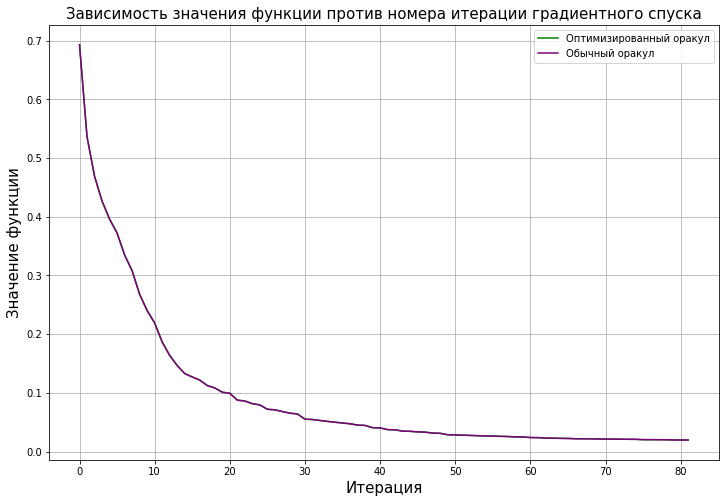

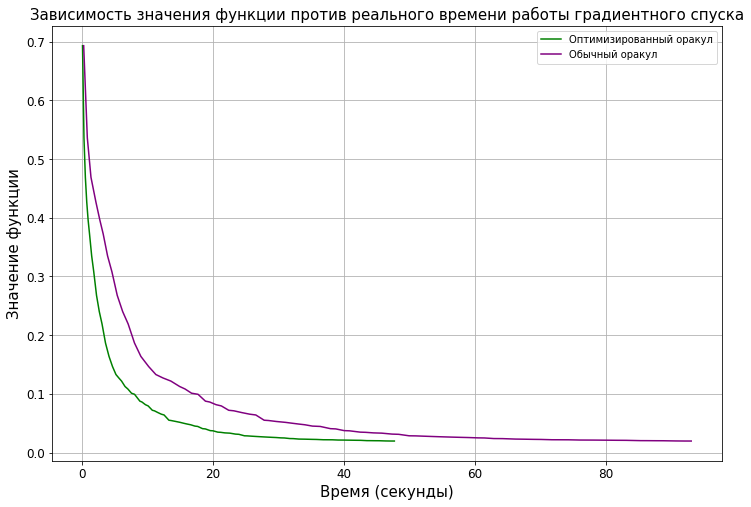

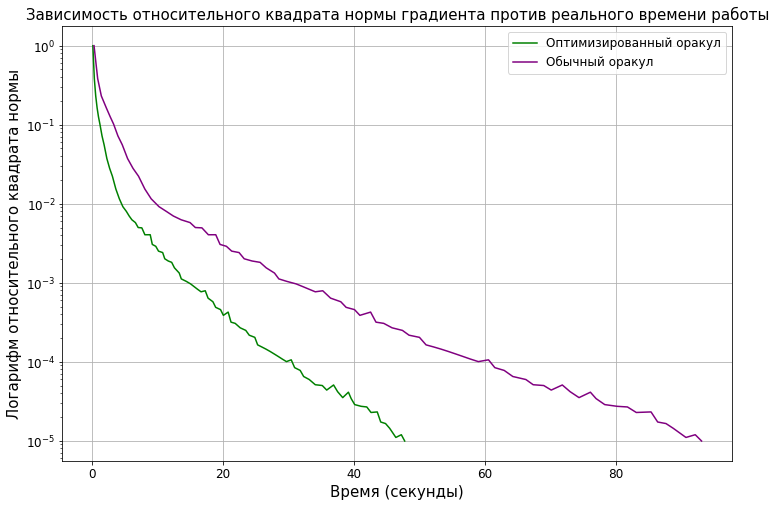

In [23]:
process(X, y)